<a href="https://colab.research.google.com/github/fikrifaizz/Brain-Tumor-MRI-Classification/blob/main/notebooks/01_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import os
import random
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image

In [3]:
TRAIN_DIR = os.path.join("../data", "raw", "Training")
TEST_DIR = os.path.join("../data", "raw", "Testing")

old_class_names = sorted(os.listdir(TRAIN_DIR))
new_class_names = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']


for base_dir in [TRAIN_DIR, TEST_DIR]:
    for old_name, new_name in zip(old_class_names, new_class_names):
        old_path = os.path.join(base_dir, old_name)
        new_path = os.path.join(base_dir, new_name)

        if os.path.exists(old_path):
            print(f"Rename: {old_path} -> {new_path}")
            os.rename(old_path, new_path)


Rename: ../data/raw/Training/Glioma -> ../data/raw/Training/Glioma
Rename: ../data/raw/Training/Meningioma -> ../data/raw/Training/Meningioma
Rename: ../data/raw/Training/No Tumor -> ../data/raw/Training/No Tumor
Rename: ../data/raw/Training/Pituitary -> ../data/raw/Training/Pituitary
Rename: ../data/raw/Testing/Glioma -> ../data/raw/Testing/Glioma
Rename: ../data/raw/Testing/Meningioma -> ../data/raw/Testing/Meningioma
Rename: ../data/raw/Testing/No Tumor -> ../data/raw/Testing/No Tumor
Rename: ../data/raw/Testing/Pituitary -> ../data/raw/Testing/Pituitary


In [4]:
def merge_datasets(source_path='../data/raw', output_path='../data/raw/Brain Tumor MRI Dataset'):
    
    source_path = Path(source_path)
    output_path = Path(output_path)
    
    classes = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
    
    print("Merging Training + Testing datasets...")
    
    total_counts = {}
    
    for cls in classes:
        # Create output directory
        (output_path / cls).mkdir(parents=True, exist_ok=True)
        
        train_path = source_path / 'Training' / cls
        test_path = source_path / 'Testing' / cls
        
        # Get all images from both folders
        train_images = list(train_path.glob('*.jpg'))
        test_images = list(test_path.glob('*.jpg'))
        
        # Copy training images
        for img in train_images:
            dest = output_path / cls / f"train_{img.name}"
            shutil.copy2(img, dest)
        
        # Copy testing images
        for img in test_images:
            dest = output_path / cls / f"test_{img.name}"
            shutil.copy2(img, dest)
        
        total = len(train_images) + len(test_images)
        total_counts[cls] = total
        
        print(f"  {cls:15s}: {len(train_images):4d} (train) + {len(test_images):3d} (test) = {total:4d} total")
    
    print(f"\nTotal merged: {sum(total_counts.values())} images")
    print(f"Output: {output_path}")
    
    return output_path, total_counts

# Merge datasets
combined_path, class_counts = merge_datasets()

Merging Training + Testing datasets...
  Glioma         : 1321 (train) + 300 (test) = 1621 total
  Meningioma     : 1339 (train) + 306 (test) = 1645 total
  No Tumor       : 1595 (train) + 405 (test) = 2000 total
  Pituitary      : 1457 (train) + 300 (test) = 1757 total

Total merged: 7023 images
Output: ../data/raw/Brain Tumor MRI Dataset


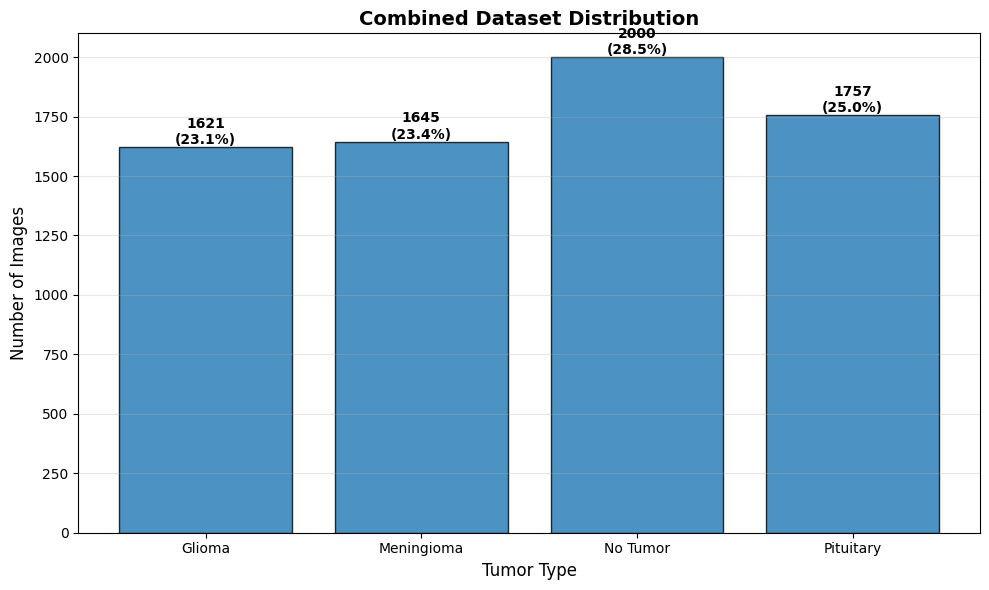

In [5]:
plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts.keys(), class_counts.values(), alpha=0.8, edgecolor='black')

plt.title('Combined Dataset Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Number of Images', fontsize=12)
plt.xlabel('Tumor Type', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, (cls, count) in zip(bars, class_counts.items()):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{count}\n({count/sum(class_counts.values())*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

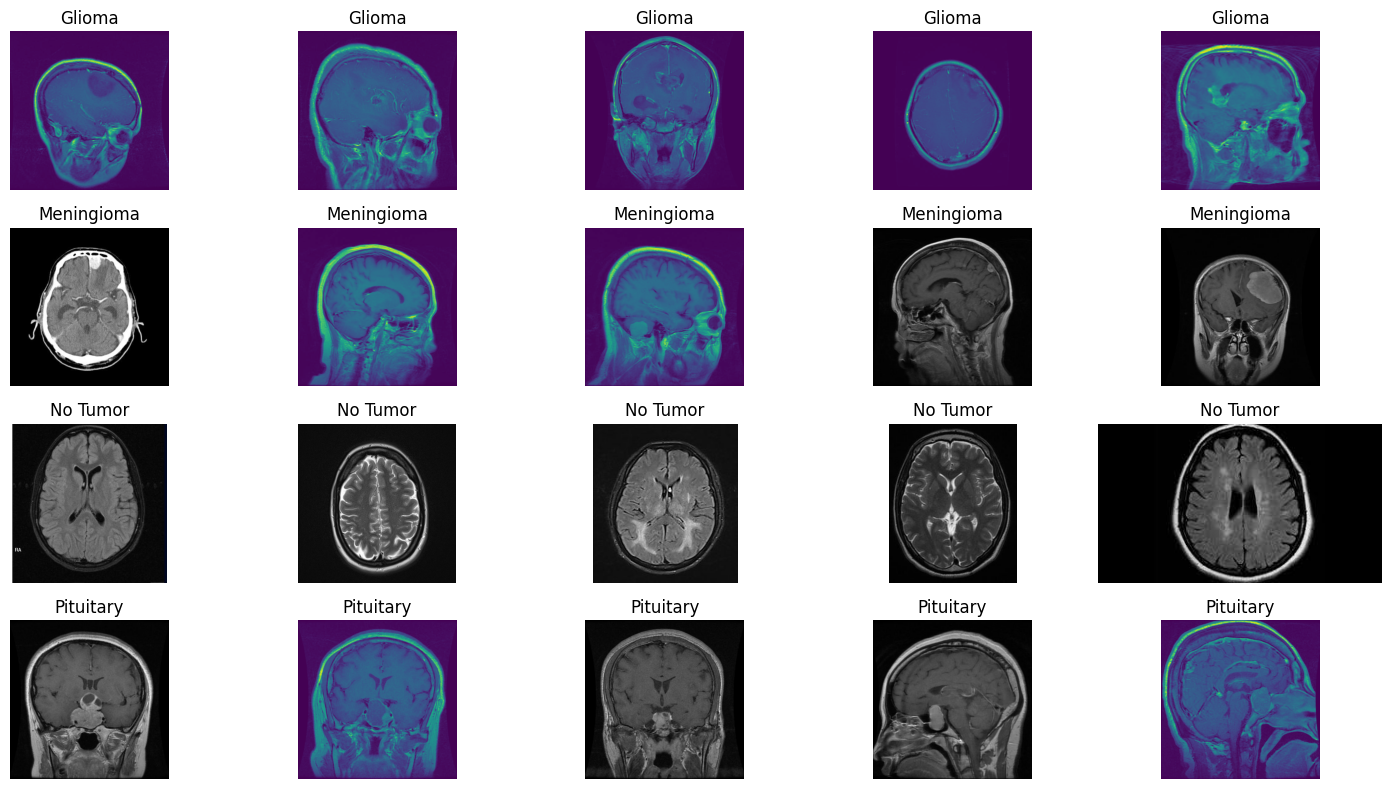

In [8]:
dataset_path = "../data/raw/Brain Tumor MRI Dataset"

classes = sorted([folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))])
num_rows = 4
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

for i, class_name in enumerate(classes[:num_rows]):
    class_path = os.path.join(dataset_path, class_name)
    images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
    selected_images = random.sample(images, min(len(images), num_cols))

    for j, image_name in enumerate(selected_images):
        img_path = os.path.join(class_path, image_name)
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].set_title(class_name)
        axes[i, j].axis("off")

plt.tight_layout()
plt.show()

In [9]:
def print_images_resolution(directory):
    unique_sizes = set()
    total_images = 0
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            image_files = os.listdir(subdir_path)
            num_images = len(image_files)
            print(f"{subdir}: {num_images}")
            total_images += num_images
            for img_file in image_files:
                img_path = os.path.join(subdir_path, img_file)
                try:
                    with Image.open(img_path) as img:
                        unique_sizes.add(img.size)
                except Exception as e:
                    print(f"Error opening {img_path}: {e}")
            for size in unique_sizes:
                print(f"- {size}")
            print("---------------")
    print(f"\nTotal: {total_images}")
print_images_resolution(dataset_path)

Pituitary: 1757
- (940, 900)
- (512, 512)
- (202, 202)
- (470, 432)
- (1280, 1280)
- (502, 502)
- (685, 681)
- (721, 903)
- (201, 210)
- (1365, 1365)
- (442, 442)
- (900, 741)
- (360, 378)
- (400, 400)
- (256, 256)
- (474, 474)
---------------
No Tumor: 2000
- (233, 210)
- (420, 280)
- (244, 274)
- (235, 216)
- (721, 903)
- (206, 244)
- (409, 442)
- (1280, 720)
- (204, 247)
- (825, 832)
- (387, 469)
- (393, 400)
- (800, 693)
- (208, 217)
- (430, 483)
- (233, 228)
- (200, 243)
- (728, 725)
- (1000, 583)
- (200, 252)
- (236, 251)
- (201, 251)
- (203, 248)
- (453, 496)
- (236, 315)
- (222, 252)
- (364, 418)
- (380, 530)
- (235, 264)
- (278, 253)
- (254, 198)
- (235, 227)
- (259, 194)
- (441, 442)
- (236, 226)
- (236, 290)
- (211, 236)
- (470, 432)
- (356, 474)
- (201, 244)
- (320, 344)
- (229, 214)
- (733, 781)
- (220, 275)
- (235, 257)
- (329, 310)
- (150, 198)
- (411, 501)
- (330, 220)
- (434, 512)
- (850, 872)
- (227, 262)
- (528, 528)
- (235, 229)
- (237, 248)
- (236, 228)
- (210, 264

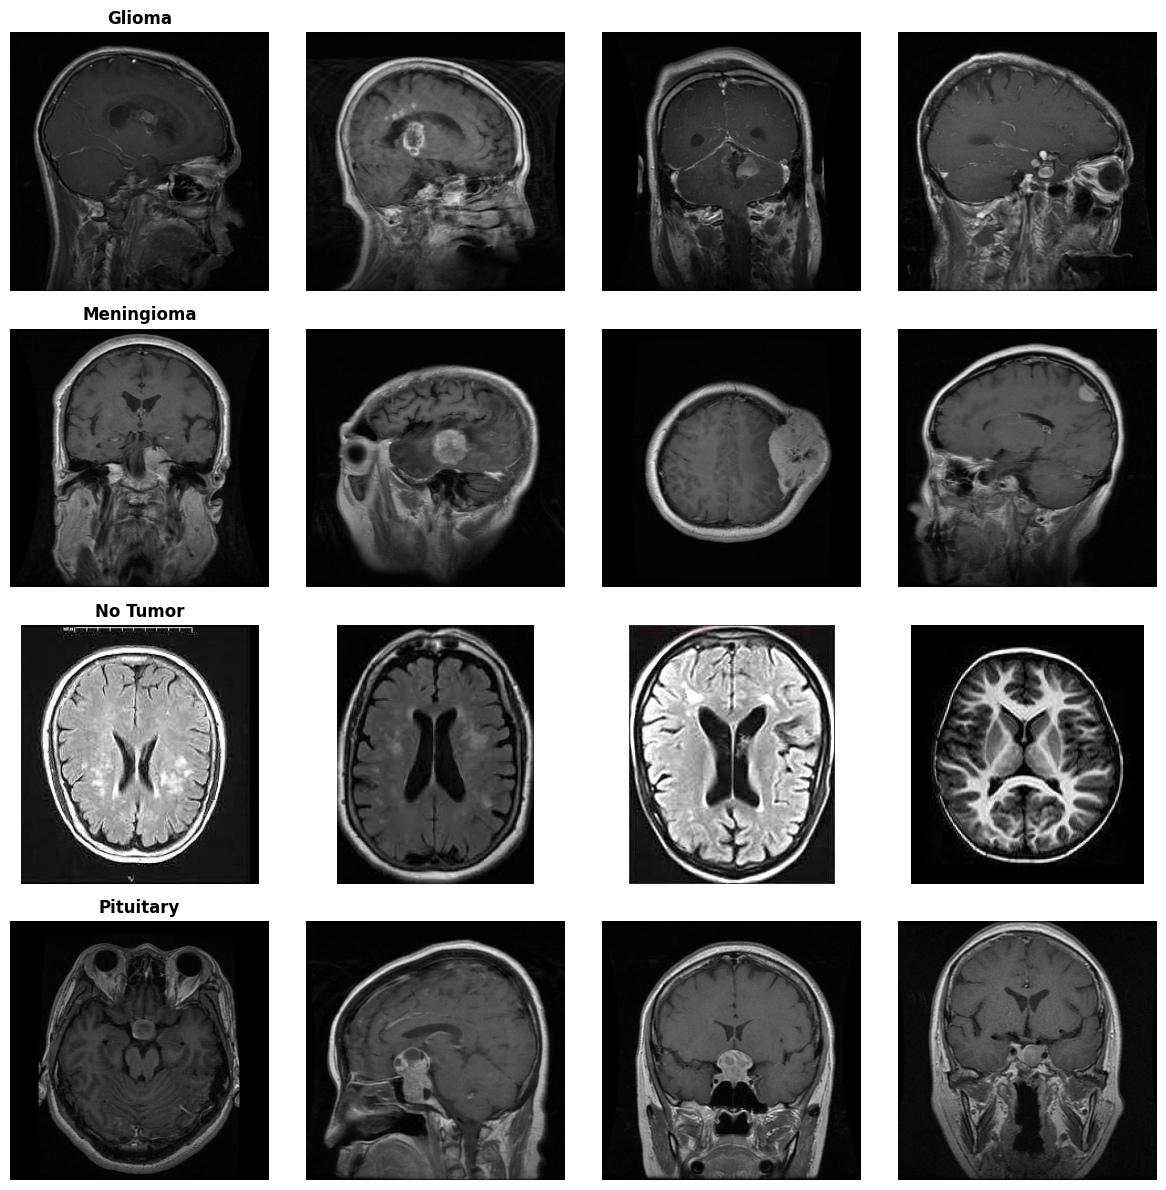

In [10]:
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
classes = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']

for i, cls in enumerate(classes):
    cls_dir = os.path.join(dataset_path, cls)
    samples = random.sample(os.listdir(cls_dir), 4)
    
    for j, img_name in enumerate(samples):
        img = Image.open(os.path.join(cls_dir, img_name))
        axes[i, j].imshow(img, cmap='gray')
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_title(cls, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

/var/folders/1d/rtg1b32x7sg4fj4dmx9191l40000gn/T/ipykernel_40203/2427708374.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Class', y='Count', palette='viridis')


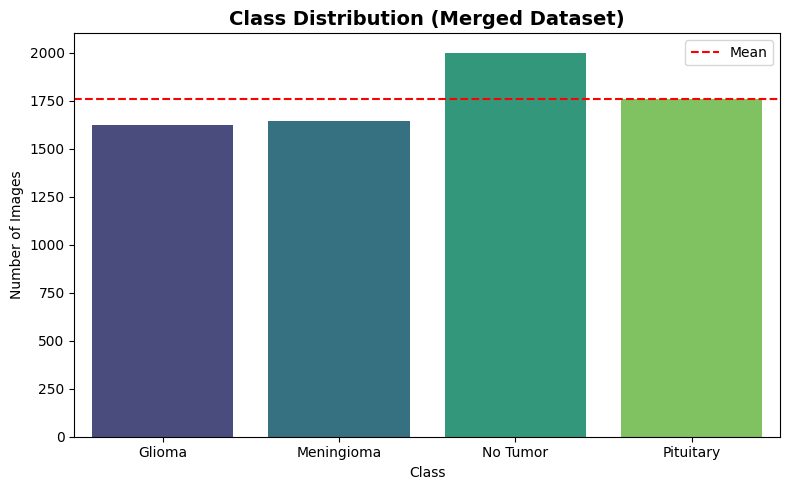

In [11]:
df = pd.DataFrame({
    'Class': classes,
    'Count': [1621, 1645, 2000, 1757]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Class', y='Count', palette='viridis')
plt.title('Class Distribution (Merged Dataset)', fontsize=14, fontweight='bold')
plt.ylabel('Number of Images')
plt.axhline(y=df['Count'].mean(), color='r', linestyle='--', label='Mean')
plt.legend()
plt.tight_layout()
plt.show()

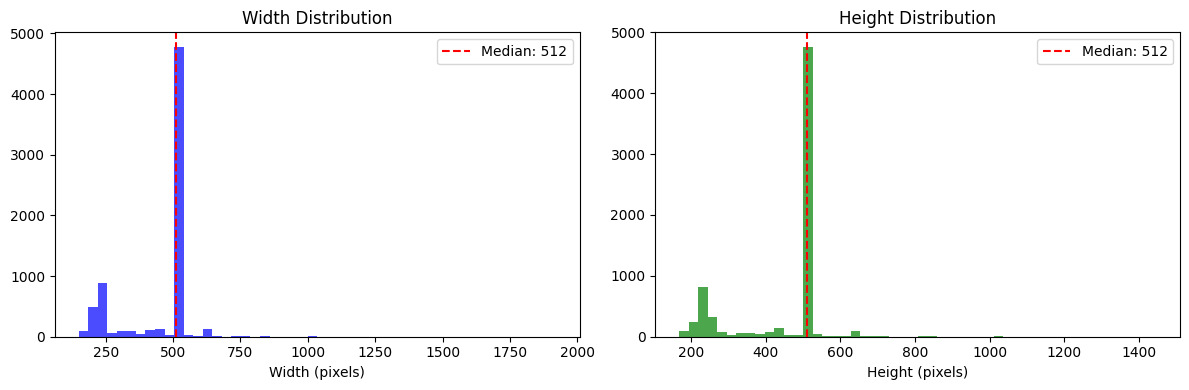

Resolution range: 150x168 to 1920x1446
Median resolution: 512x512


In [12]:
resolutions = []
for cls in classes:
    cls_dir = os.path.join(dataset_path, cls)
    for img_name in os.listdir(cls_dir):
        img = Image.open(os.path.join(cls_dir, img_name))
        resolutions.append(img.size)

widths = [r[0] for r in resolutions]
heights = [r[1] for r in resolutions]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.hist(widths, bins=50, color='blue', alpha=0.7)
ax1.set_title('Width Distribution')
ax1.set_xlabel('Width (pixels)')
ax1.axvline(np.median(widths), color='r', linestyle='--', label=f'Median: {int(np.median(widths))}')
ax1.legend()

ax2.hist(heights, bins=50, color='green', alpha=0.7)
ax2.set_title('Height Distribution')
ax2.set_xlabel('Height (pixels)')
ax2.axvline(np.median(heights), color='r', linestyle='--', label=f'Median: {int(np.median(heights))}')
ax2.legend()

plt.tight_layout()
plt.show()

print(f"Resolution range: {min(widths)}x{min(heights)} to {max(widths)}x{max(heights)}")
print(f"Median resolution: {int(np.median(widths))}x{int(np.median(heights))}")